# 1.0 Full Exploratory Data Analysis

## Dowload (call dowload)

In [1]:
run '/Users/rodolfobarillas/Documents/Programación/Datacience/cookicutter/final_project/notebooks/Dowload_read_processdata/0.0-rudolfd-dowload_data.ipynb'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1532k  100 1532k    0     0  1132k      0  0:00:01 --:--:--  0:00:01  809k 0  0:00:01  0:00:01 --:--:-- 1135k


## Libraries

In [2]:
#import final_project.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Read data (call read_data)

In [3]:
run '/Users/rodolfobarillas/Documents/Programación/Datacience/cookicutter/final_project/notebooks/Dowload_read_processdata/0.1-rudold-read_data.ipynb'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1532k  100 1532k    0     0  1275k      0  0:00:01  0:00:01 --:--:-- 1278k
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1014 entries, Province/State to 10/27/22
dtypes: float64(2), int64(1010), object(2)
memory usage: 2.2+ MB


## Process data (call process_data)

In [4]:
run '/Users/rodolfobarillas/Documents/Programación/Datacience/cookicutter/final_project/notebooks/Dowload_read_processdata/0.2-rudolfd-procces_data.ipynb'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1532k  100 1532k    0     0   993k      0  0:00:01  0:00:01 --:--:--  996k70k
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1532k  100 1532k    0     0  1234k      0  0:00:01  0:00:01 --:--:-- 1237k
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1014 entries, Province/State to 10/27/22
dtypes: float64(2), int64(1010), object(2)
memory usage: 2.2+ MB


## Explore data

### Read data

In [5]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [6]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291890 entries, 0 to 291889
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  291890 non-null  object
 1   date            291890 non-null  object
 2   value           291890 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.7+ MB


In [7]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [8]:
sns.set_style("whitegrid")

In [9]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [10]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


Plot time series.

In [11]:
import final_project.visualization.visualize as visualize

ModuleNotFoundError: No module named 'final_project'

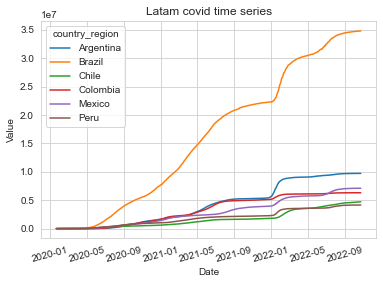

In [ ]:
covid_time_series(some_latam_countries_df)

#### Latam in global context

Top `n` countries.

In [ ]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .aggregate("sum")
    .sort_values("value", ascending=False)
    .reset_index()
    .head(20)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

,country_region,value,color
0,US,40126240994,lightblue
1,India,23055018996,lightblue
2,Brazil,16276096369,red
3,France,10816070365,lightblue
4,United Kingdom,8802560120,lightblue


Plot to Latam in highlighted bars.

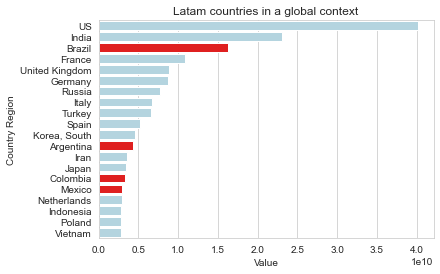

In [ ]:
sns.barplot(
    data=top_countries_df,
    x="value",
    y="country_region",
    palette=top_countries_df.color
)

plt.xlabel("Value")
plt.ylabel("Country Region")
plt.title("Latam countries in a global context");